In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = pd.read_csv('salary.csv')
data.dropna()

data.head(n=3)

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2


In [28]:
data = pd.read_csv('salary.csv')

df = data.drop(['degree','otherqual','position','male','Field'], axis=1)

# Remove Nan values
data.dropna(how='any',axis=0)

df.shape

y = df.salary

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(411, 6)
(103, 6)


In [34]:
import pandas as pd
#plt.hist(X_train['salary'],data=X_train, bins=20)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

trace = go.Bar(
    x = X_train,
    y = X_train['salary']
)

data = [trace]

iplot(data, filename='basic-line')

In [1]:
import pandas as pd

data = pd.read_csv('salary.csv')
data.dropna()

dummy = pd.get_dummies(data['position'])

dummy.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

data = pd.read_csv('salary.csv')
data.dropna()

trace = go.Heatmap(z=[data.salary],
                   x=[data.yearsworked, data.exprior, data.degree],
                   y=[data.male, data.otherqual, data.yearsrank])
data_df=[trace]
iplot(data_df, filename='labelled-heatmap')

In [25]:
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as lm

data = pd.read_csv('salary.csv')

df = data.drop(['degree','otherqual','position','male','Field'], axis=1)

# Remove Nan values
data.dropna(how='any',axis=0)

df.shape

y = df.salary

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
#print(X_train.shape)
#print(X_test.shape)
"""X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
lm = smf.ols(formula='X_train ~ y_train', data=X_train).fit()"""

"""model=lm.fit(train,test)
predictions=lm.params(test)
import matplotlib.pyplot as plt
plt.scatter(test,predictions)"""

model = lm()
results = model.fit(X_train, y_train)

print(model.intercept_,model.coef_)


1.4551915228366852e-11 [ 1.00000000e+00 -3.71039267e-15  4.18406154e-15 -8.60337341e-15
  2.58043530e-14  1.41548950e-15]


In [71]:
import statsmodels.api as sm 

x = X_train
x = sm.add_constant(x)

#Train
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.582e+32
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        12:13:35   Log-Likelihood:                 9614.0
No. Observations:                 411   AIC:                        -1.922e+04
Df Residuals:                     405   BIC:                        -1.919e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
salary          1.0000   1.21e-16   8.24e+15      0.000       1.000       1.000
exprior      4.547e-13   2.13e-13      2.139      0.033    3.68e-14    8.73e-13
yearsworked  2.842e-13   1.83e-13      1.550      0.122   -7.63e-14    6.45e-13
yearsrank     1.99e-13    2.3e-13      0.866      0.387   -2.53e-13    6.51e-13
market      -1.819e-12   4.94e-12     -0.369      0.713   -1.15e-11    7.88e-12
yearsabs     2.132e-14   5.07e-14      0.421      0.674   -7.83e-14    1.21e-13
==============================================================================
Omnibus:                       37.508   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.559
Skew:                          -0.411   Prob(JB):                     2.08e-05
Kurtosis:                       2.237   Cond. No.                     3.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
__5.Calculate__ the standardised residuals (resid()) and standardised predicted values (fittedvalues())__

SyntaxError: invalid syntax (<ipython-input-106-483896688810>, line 1)

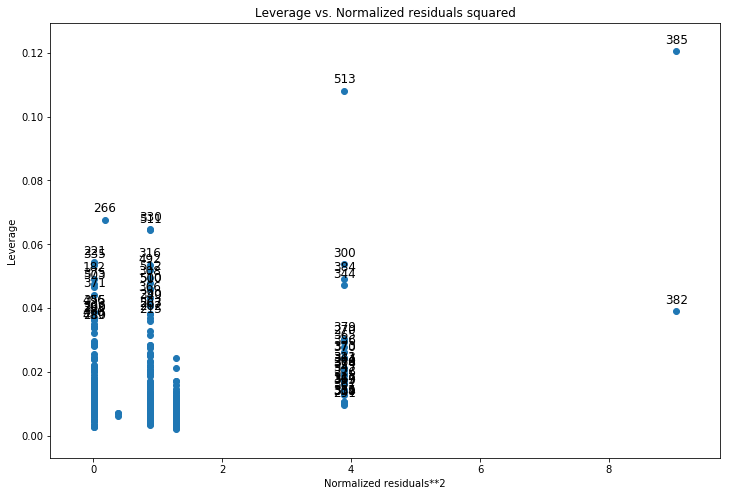

In [110]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn

#5.Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_leverage_resid2(model, ax=ax)



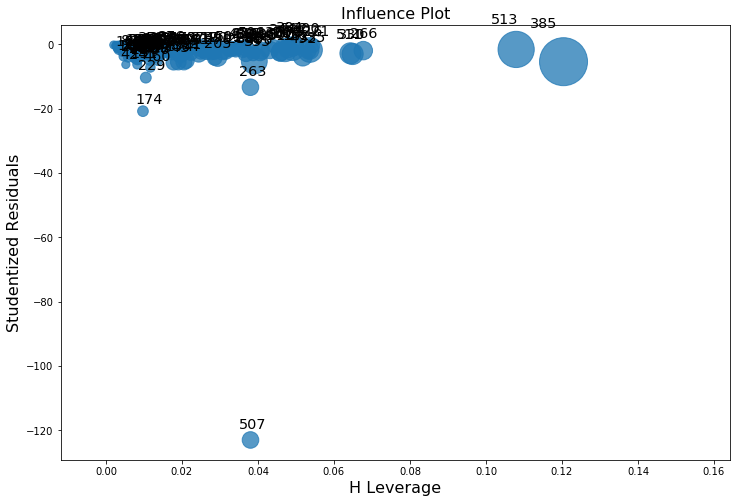

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [62]:
import statsmodels.api as sm
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#6. Plot the residuals versus the predicted values 
#using `seaborn`'s `residplot` with fitted values as the x parameter, 
#and the dependent variable as y. lowess=True.

init_notebook_mode(connected=True)

trace = go.Bar(
    x =  ,
    y = 
)

data = [trace]

iplot(data, filename='basic-line')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'x' property of bar
        Received value: 'Studendized Residuals'

    The 'x' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series